In [ ]:
# %%

import torch
from util.gpu_info import gpuInfo
from util.data_augmentation import data_augmentation
from util.loss import BCEIoULoss
from util.training import train
from util.testing import test
from util.data_load import data_load

from networks.LinkNetB7 import *
from networks.DLinkNet34 import *
from networks.DLinkNet50 import *
from networks.DLinkNet101 import *
from networks.LinkNet34 import *
from networks.UNet import *
from networks.DLinkNet152 import *
from networks.LinkNet152 import *

training_data_processing = False
model_training = True
model_validation = True
model_loading = False

batch_size = 4

path_training = "./training/"
path_testing = "./test/"
path_data = "./data/"
path_model = "./models/LinkNet152.model"

cuda_available = torch.cuda.is_available()
device = torch.device("cuda" if cuda_available else "cpu")

gpu_info = gpuInfo()

model = LinkNet152()
if cuda_available:
    model.cuda()

print(model)

Mon Jan 20 14:31:16 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 555.42.06              Driver Version: 555.42.06      CUDA Version: 12.5     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4080        Off |   00000000:01:00.0  On |                  N/A |
|  0%   44C    P8             15W /  340W |     476MiB /  16376MiB |      9%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

/home/wesley/miniconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/wesley/miniconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet152_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet152_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Sequential(
  (0): Bottleneck(
    (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (downsample): Sequential(
      (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (1): Bottleneck(
    (conv1): Conv2d(256, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(64, 64, ke

In [ ]:
# %%

if training_data_processing:
    training_resize = 512
    training_number = 367
    testing_resize = int(608 * training_resize / 400)
    if testing_resize % 2 == 1:
        testing_resize += 1

    data_augmentation(
        training_resize,
        training_number,
        testing_resize,
    )

In [ ]:
# %%

if not model_loading:
    training_generator, validation_generator = data_load(
        path_data, model_validation, batch_size
    )


 Fim do Carregamento Training Data

 Fim do Carregamento Validation Data

 Fim do Carregamento


/home/wesley/miniconda3/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(
  0%|          | 0/20 [00:00<?, ?it/s]


---------Training for Epoch 1 starting:---------
→ Running_loss for Batch 1: 0.39538654685020447
→ ACC for Batch 1: 0.8347845077514648
→ Recall for Batch 1: 0.19511766772040745
→ Running_loss for Batch 21: 0.38455870747566223
→ ACC for Batch 21: 0.9608783721923828
→ Recall for Batch 21: 0.0
→ Running_loss for Batch 41: 0.37263622879981995
→ ACC for Batch 41: 0.9748115539550781
→ Recall for Batch 41: 0.0
→ Running_loss for Batch 61: 0.2915695309638977
→ ACC for Batch 61: 0.9656763076782227
→ Recall for Batch 61: 0.0
→ Running_loss for Batch 81: 0.29761797189712524
→ ACC for Batch 81: 0.9678525924682617
→ Recall for Batch 81: 0.0
→ Running_loss for Batch 101: 0.3054342269897461
→ ACC for Batch 101: 0.9592666625976562
→ Recall for Batch 101: 0.0
→ Running_loss for Batch 121: 0.29448145627975464
→ ACC for Batch 121: 0.9841232299804688
→ Recall for Batch 121: 0.6330521876647338
→ Running_loss for Batch 141: 0.28033289313316345
→ ACC for Batch 141: 0.9775791168212891
→ Recall for Batch 141:

  5%|▌         | 1/20 [09:12<2:55:00, 552.68s/it]


---------Training for Epoch 2 starting:---------
→ Running_loss for Batch 1: 0.3531199097633362
→ ACC for Batch 1: 0.984095573425293
→ Recall for Batch 1: 0.6327868852459017
→ Running_loss for Batch 21: 0.17803101241588593
→ ACC for Batch 21: 0.9849348068237305
→ Recall for Batch 21: 0.7513441878076487
→ Running_loss for Batch 41: 0.1976248025894165
→ ACC for Batch 41: 0.9862747192382812
→ Recall for Batch 41: 0.7458999899386256
→ Running_loss for Batch 61: 0.22321701049804688
→ ACC for Batch 61: 0.9917335510253906
→ Recall for Batch 61: 0.8234872896527032
→ Running_loss for Batch 81: 0.20380966365337372
→ ACC for Batch 81: 0.9764070510864258
→ Recall for Batch 81: 0.7216106167998794
→ Running_loss for Batch 101: 0.27517324686050415
→ ACC for Batch 101: 0.9767351150512695
→ Recall for Batch 101: 0.6894652141619213
→ Running_loss for Batch 121: 0.2111603021621704
→ ACC for Batch 121: 0.9806699752807617
→ Recall for Batch 121: 0.6701428414056475
→ Running_loss for Batch 141: 0.195578813

 10%|█         | 2/20 [17:14<2:33:16, 510.91s/it]


---------Training for Epoch 3 starting:---------
→ Running_loss for Batch 1: 0.14665861427783966
→ ACC for Batch 1: 0.9804534912109375
→ Recall for Batch 1: 0.7628474605353466
→ Running_loss for Batch 21: 0.14342100918293
→ ACC for Batch 21: 0.9893608093261719
→ Recall for Batch 21: 0.8574117647058823
→ Running_loss for Batch 41: 0.1811947524547577
→ ACC for Batch 41: 0.9822378158569336
→ Recall for Batch 41: 0.7610376569037657
→ Running_loss for Batch 61: 0.16361655294895172
→ ACC for Batch 61: 0.9900045394897461
→ Recall for Batch 61: 0.8142126026228809
→ Running_loss for Batch 81: 0.1532803177833557
→ ACC for Batch 81: 0.9879131317138672
→ Recall for Batch 81: 0.8578720555625288
→ Running_loss for Batch 101: 0.20825599133968353
→ ACC for Batch 101: 0.976872444152832
→ Recall for Batch 101: 0.608810954159225
→ Running_loss for Batch 121: 0.26450520753860474
→ ACC for Batch 121: 0.9904441833496094
→ Recall for Batch 121: 0.6391930126706852
→ Running_loss for Batch 141: 0.214145511388

 15%|█▌        | 3/20 [26:27<2:30:16, 530.35s/it]


---------Training for Epoch 4 starting:---------
→ Running_loss for Batch 1: 0.1565791219472885
→ ACC for Batch 1: 0.9737167358398438
→ Recall for Batch 1: 0.7763990747547921
→ Running_loss for Batch 21: 0.18540528416633606
→ ACC for Batch 21: 0.9846639633178711
→ Recall for Batch 21: 0.7244937244937245
→ Running_loss for Batch 41: 0.1515369713306427
→ ACC for Batch 41: 0.983668327331543
→ Recall for Batch 41: 0.7403700015722446
→ Running_loss for Batch 61: 0.12702210247516632
→ ACC for Batch 61: 0.9906845092773438
→ Recall for Batch 61: 0.8183753241224505
→ Running_loss for Batch 81: 0.2948557734489441
→ ACC for Batch 81: 0.9886999130249023
→ Recall for Batch 81: 0.6911670918367347
→ Running_loss for Batch 101: 0.1618177741765976
→ ACC for Batch 101: 0.9876899719238281
→ Recall for Batch 101: 0.8125239616613419
→ Running_loss for Batch 121: 0.17345693707466125
→ ACC for Batch 121: 0.9949464797973633
→ Recall for Batch 121: 0.7597765363128491
→ Running_loss for Batch 141: 0.1462228149

 20%|██        | 4/20 [34:38<2:17:16, 514.80s/it]

Validation loss for Epoch 4: 0.17390568554401398

Acurácia de validação:  0.9851108619144985
F1-score de validação:  0.7098908404014403
IoU de validação:  0.9739640471209879
Recall de validação:  0.7318447905552501

---------Training for Epoch 5 starting:---------
→ Running_loss for Batch 1: 0.12500889599323273
→ ACC for Batch 1: 0.9818925857543945
→ Recall for Batch 1: 0.8264103421813818
→ Running_loss for Batch 21: 0.19127333164215088
→ ACC for Batch 21: 0.9806423187255859
→ Recall for Batch 21: 0.7616273195702691
→ Running_loss for Batch 41: 0.13234956562519073
→ ACC for Batch 41: 0.9904947280883789
→ Recall for Batch 41: 0.777145712418803
→ Running_loss for Batch 61: 0.13636751472949982
→ ACC for Batch 61: 0.9851665496826172
→ Recall for Batch 61: 0.7886448512705335
→ Running_loss for Batch 81: 0.17915765941143036
→ ACC for Batch 81: 0.9921665191650391
→ Recall for Batch 81: 0.688662593346911
→ Running_loss for Batch 101: 0.14962944388389587
→ ACC for Batch 101: 0.9863071441650391


 25%|██▌       | 5/20 [43:39<2:10:59, 523.98s/it]


---------Training for Epoch 6 starting:---------
→ Running_loss for Batch 1: 0.12909430265426636
→ ACC for Batch 1: 0.9847841262817383
→ Recall for Batch 1: 0.8103580869983177
→ Running_loss for Batch 21: 0.1263434886932373
→ ACC for Batch 21: 0.9885406494140625
→ Recall for Batch 21: 0.8389218674795443
→ Running_loss for Batch 41: 0.12723098695278168
→ ACC for Batch 41: 0.9857921600341797
→ Recall for Batch 41: 0.7984349299705926
→ Running_loss for Batch 61: 0.15397968888282776
→ ACC for Batch 61: 0.9925384521484375
→ Recall for Batch 61: 0.7565411807359961
→ Running_loss for Batch 81: 0.17340373992919922
→ ACC for Batch 81: 0.9940128326416016
→ Recall for Batch 81: 0.8171712158808933
→ Running_loss for Batch 101: 0.16203536093235016
→ ACC for Batch 101: 0.9864110946655273
→ Recall for Batch 101: 0.7311525506129111
→ Running_loss for Batch 121: 0.134559765458107
→ ACC for Batch 121: 0.9891471862792969
→ Recall for Batch 121: 0.7955805005471425
→ Running_loss for Batch 141: 0.15993981

 30%|███       | 6/20 [53:03<2:05:27, 537.66s/it]


---------Training for Epoch 7 starting:---------
→ Running_loss for Batch 1: 0.1545592099428177
→ ACC for Batch 1: 0.9868679046630859
→ Recall for Batch 1: 0.8173713609292347
→ Running_loss for Batch 21: 0.11544406414031982
→ ACC for Batch 21: 0.9957818984985352
→ Recall for Batch 21: 0.8759826728702069
→ Running_loss for Batch 41: 0.11948046088218689
→ ACC for Batch 41: 0.9917383193969727
→ Recall for Batch 41: 0.829151246492334
→ Running_loss for Batch 61: 0.1420438289642334
→ ACC for Batch 61: 0.9846792221069336
→ Recall for Batch 61: 0.7434992381919756
→ Running_loss for Batch 81: 0.14264069497585297
→ ACC for Batch 81: 0.9935054779052734
→ Recall for Batch 81: 0.7906558849955077
→ Running_loss for Batch 101: 0.10355837643146515
→ ACC for Batch 101: 0.9922246932983398
→ Recall for Batch 101: 0.8564280496712929
→ Running_loss for Batch 121: 0.1575459986925125
→ ACC for Batch 121: 0.9870538711547852
→ Recall for Batch 121: 0.7366534284609707
→ Running_loss for Batch 141: 0.136133596

 35%|███▌      | 7/20 [1:02:28<1:58:28, 546.78s/it]


---------Training for Epoch 8 starting:---------
→ Running_loss for Batch 1: 0.12277895212173462
→ ACC for Batch 1: 0.9926156997680664
→ Recall for Batch 1: 0.8506199854121079
→ Running_loss for Batch 21: 0.12238329648971558
→ ACC for Batch 21: 0.9897861480712891
→ Recall for Batch 21: 0.8533235221976944
→ Running_loss for Batch 41: 0.11354321241378784
→ ACC for Batch 41: 0.9906492233276367
→ Recall for Batch 41: 0.7880605541273922
→ Running_loss for Batch 61: 0.10370689630508423
→ ACC for Batch 61: 0.9917173385620117
→ Recall for Batch 61: 0.8926533395542475
→ Running_loss for Batch 81: 0.10028202086687088
→ ACC for Batch 81: 0.9889249801635742
→ Recall for Batch 81: 0.8768070395977373
→ Running_loss for Batch 101: 0.09822837263345718
→ ACC for Batch 101: 0.9915370941162109
→ Recall for Batch 101: 0.8561004634849054
→ Running_loss for Batch 121: 0.11245686560869217
→ ACC for Batch 121: 0.9910764694213867
→ Recall for Batch 121: 0.8390458869613878
→ Running_loss for Batch 141: 0.10320

 40%|████      | 8/20 [1:11:08<1:47:36, 538.01s/it]


---------Training for Epoch 9 starting:---------
→ Running_loss for Batch 1: 0.11297935992479324
→ ACC for Batch 1: 0.9962892532348633
→ Recall for Batch 1: 0.8246866439777538
→ Running_loss for Batch 21: 0.09450142085552216
→ ACC for Batch 21: 0.990229606628418
→ Recall for Batch 21: 0.8657089319175515
→ Running_loss for Batch 41: 0.10745015740394592
→ ACC for Batch 41: 0.9942684173583984
→ Recall for Batch 41: 0.8695952039896016
→ Running_loss for Batch 61: 0.10490687191486359
→ ACC for Batch 61: 0.9908809661865234
→ Recall for Batch 61: 0.887585821753556
→ Running_loss for Batch 81: 0.10877138376235962
→ ACC for Batch 81: 0.9847803115844727
→ Recall for Batch 81: 0.8522508580838443
→ Running_loss for Batch 101: 0.12157220393419266
→ ACC for Batch 101: 0.9858417510986328
→ Recall for Batch 101: 0.8173368695195088
→ Running_loss for Batch 121: 0.1357230842113495
→ ACC for Batch 121: 0.9916210174560547
→ Recall for Batch 121: 0.851436510693197
→ Running_loss for Batch 141: 0.107738889

 45%|████▌     | 9/20 [1:20:29<1:39:58, 545.28s/it]


---------Training for Epoch 10 starting:---------
→ Running_loss for Batch 1: 0.1157139241695404
→ ACC for Batch 1: 0.9933156967163086
→ Recall for Batch 1: 0.8110948767497761
→ Running_loss for Batch 21: 0.1251000016927719
→ ACC for Batch 21: 0.9944581985473633
→ Recall for Batch 21: 0.8560048199223457
→ Running_loss for Batch 41: 0.1319808065891266
→ ACC for Batch 41: 0.9937725067138672
→ Recall for Batch 41: 0.833145856767904
→ Running_loss for Batch 61: 0.13430698215961456
→ ACC for Batch 61: 0.9902315139770508
→ Recall for Batch 61: 0.8170520812386889
→ Running_loss for Batch 81: 0.13849973678588867
→ ACC for Batch 81: 0.9917221069335938
→ Recall for Batch 81: 0.7654274919539158
→ Running_loss for Batch 101: 0.1247355043888092
→ ACC for Batch 101: 0.9886369705200195
→ Recall for Batch 101: 0.7882866714525006
→ Running_loss for Batch 121: 0.11705497652292252
→ ACC for Batch 121: 0.9920625686645508
→ Recall for Batch 121: 0.8008241213994215
→ Running_loss for Batch 141: 0.103147752

 50%|█████     | 10/20 [1:29:02<1:29:12, 535.27s/it]

Validation loss for Epoch 10: 0.13368093967437744

Acurácia de validação:  0.9872841800962175
F1-score de validação:  0.7538386111095193
IoU de validação:  0.9774948076773884
Recall de validação:  0.7788487173784796

---------Training for Epoch 11 starting:---------
→ Running_loss for Batch 1: 0.09582251310348511
→ ACC for Batch 1: 0.9886589050292969
→ Recall for Batch 1: 0.8870458320660694
→ Running_loss for Batch 21: 0.11148687452077866
→ ACC for Batch 21: 0.9903783798217773
→ Recall for Batch 21: 0.8668650793650794
→ Running_loss for Batch 41: 0.09756104648113251
→ ACC for Batch 41: 0.9901914596557617
→ Recall for Batch 41: 0.8765158358654294
→ Running_loss for Batch 61: 0.09088875353336334
→ ACC for Batch 61: 0.9926815032958984
→ Recall for Batch 61: 0.8772728794829723
→ Running_loss for Batch 81: 0.11165514588356018
→ ACC for Batch 81: 0.9926509857177734
→ Recall for Batch 81: 0.8851231614389509
→ Running_loss for Batch 101: 0.12126079946756363
→ ACC for Batch 101: 0.9925670623779

 55%|█████▌    | 11/20 [1:38:21<1:21:22, 542.48s/it]


---------Training for Epoch 12 starting:---------
→ Running_loss for Batch 1: 0.10109639912843704
→ ACC for Batch 1: 0.9846134185791016
→ Recall for Batch 1: 0.841322459002017
→ Running_loss for Batch 21: 0.10870108753442764
→ ACC for Batch 21: 0.9897117614746094
→ Recall for Batch 21: 0.8291343761617432
→ Running_loss for Batch 41: 0.11005990952253342
→ ACC for Batch 41: 0.9959735870361328
→ Recall for Batch 41: 0.8276246377888402
→ Running_loss for Batch 61: 0.08716075867414474
→ ACC for Batch 61: 0.9893684387207031
→ Recall for Batch 61: 0.8714050589050589
→ Running_loss for Batch 81: 0.10423887521028519
→ ACC for Batch 81: 0.9941244125366211
→ Recall for Batch 81: 0.8679020909721534
→ Running_loss for Batch 101: 0.08819372951984406
→ ACC for Batch 101: 0.9916286468505859
→ Recall for Batch 101: 0.8861387550258063
→ Running_loss for Batch 121: 0.09466484934091568
→ ACC for Batch 121: 0.9881477355957031
→ Recall for Batch 121: 0.8644815564068351
→ Running_loss for Batch 141: 0.10634

 60%|██████    | 12/20 [1:47:41<1:13:04, 548.06s/it]


---------Training for Epoch 13 starting:---------
→ Running_loss for Batch 1: 0.08539645373821259
→ ACC for Batch 1: 0.9962759017944336
→ Recall for Batch 1: 0.9010400448402566
→ Running_loss for Batch 21: 0.10419150441884995
→ ACC for Batch 21: 0.9943132400512695
→ Recall for Batch 21: 0.8525824424032525
→ Running_loss for Batch 41: 0.12621966004371643
→ ACC for Batch 41: 0.9880199432373047
→ Recall for Batch 41: 0.8402363241191416
→ Running_loss for Batch 61: 0.14028307795524597
→ ACC for Batch 61: 0.9946069717407227
→ Recall for Batch 61: 0.7359971959341044
→ Running_loss for Batch 81: 0.09729409962892532
→ ACC for Batch 81: 0.9880228042602539
→ Recall for Batch 81: 0.8596774898396189
→ Running_loss for Batch 101: 0.08839372545480728
→ ACC for Batch 101: 0.9930944442749023
→ Recall for Batch 101: 0.8836190541892311
→ Running_loss for Batch 121: 0.11455465108156204
→ ACC for Batch 121: 0.9944095611572266
→ Recall for Batch 121: 0.8466257668711656
→ Running_loss for Batch 141: 0.1029

 65%|██████▌   | 13/20 [1:56:37<1:03:29, 544.24s/it]


---------Training for Epoch 14 starting:---------
→ Running_loss for Batch 1: 0.12056970596313477
→ ACC for Batch 1: 0.9936361312866211
→ Recall for Batch 1: 0.7998138284118529
→ Running_loss for Batch 21: 0.09560007601976395
→ ACC for Batch 21: 0.9936227798461914
→ Recall for Batch 21: 0.8695510602792137
→ Running_loss for Batch 41: 0.102244533598423
→ ACC for Batch 41: 0.995086669921875
→ Recall for Batch 41: 0.8452561297200247
→ Running_loss for Batch 61: 0.1003541350364685
→ ACC for Batch 61: 0.9888458251953125
→ Recall for Batch 61: 0.8547198360015619
→ Running_loss for Batch 81: 0.1440967172384262
→ ACC for Batch 81: 0.9878787994384766
→ Recall for Batch 81: 0.8288258933420224
→ Running_loss for Batch 101: 0.08900764584541321
→ ACC for Batch 101: 0.9926729202270508
→ Recall for Batch 101: 0.9111502387160126
→ Running_loss for Batch 121: 0.10013607889413834
→ ACC for Batch 121: 0.9945220947265625
→ Recall for Batch 121: 0.8750063255908102
→ Running_loss for Batch 141: 0.089344002

 70%|███████   | 14/20 [2:04:35<52:25, 524.22s/it]  


---------Training for Epoch 15 starting:---------
→ Running_loss for Batch 1: 0.0897500216960907
→ ACC for Batch 1: 0.9931087493896484
→ Recall for Batch 1: 0.8705313673668104
→ Running_loss for Batch 21: 0.09616870433092117
→ ACC for Batch 21: 0.9934883117675781
→ Recall for Batch 21: 0.8637801898506028
→ Running_loss for Batch 41: 0.08503289520740509
→ ACC for Batch 41: 0.9946813583374023
→ Recall for Batch 41: 0.8845547843120555
→ Running_loss for Batch 61: 0.12135452777147293
→ ACC for Batch 61: 0.980504035949707
→ Recall for Batch 61: 0.8631405893687355
→ Running_loss for Batch 81: 0.08160946518182755
→ ACC for Batch 81: 0.9947376251220703
→ Recall for Batch 81: 0.9052834781149021
→ Running_loss for Batch 101: 0.1128670796751976
→ ACC for Batch 101: 0.9928913116455078
→ Recall for Batch 101: 0.842413487133984
→ Running_loss for Batch 121: 0.07801733911037445
→ ACC for Batch 121: 0.9902381896972656
→ Recall for Batch 121: 0.9134414507548836
→ Running_loss for Batch 141: 0.09757523

 75%|███████▌  | 15/20 [2:12:49<42:55, 515.09s/it]


---------Training for Epoch 16 starting:---------
→ Running_loss for Batch 1: 0.12794780731201172
→ ACC for Batch 1: 0.9876670837402344
→ Recall for Batch 1: 0.8041767114932179
→ Running_loss for Batch 21: 0.09932783991098404
→ ACC for Batch 21: 0.9853982925415039
→ Recall for Batch 21: 0.8571192721135855
→ Running_loss for Batch 41: 0.09316010773181915
→ ACC for Batch 41: 0.9951801300048828
→ Recall for Batch 41: 0.888296454278859
→ Running_loss for Batch 61: 0.08285140246152878
→ ACC for Batch 61: 0.9932727813720703
→ Recall for Batch 61: 0.879554820078523
→ Running_loss for Batch 81: 0.10958915203809738
→ ACC for Batch 81: 0.9959497451782227
→ Recall for Batch 81: 0.8313430635412059
→ Running_loss for Batch 101: 0.109742172062397
→ ACC for Batch 101: 0.9955511093139648
→ Recall for Batch 101: 0.8334795815052312
→ Running_loss for Batch 121: 0.1368558555841446
→ ACC for Batch 121: 0.9911174774169922
→ Recall for Batch 121: 0.7858577040593627
→ Running_loss for Batch 141: 0.075763754

 80%|████████  | 16/20 [2:21:09<34:03, 510.77s/it]


---------Training for Epoch 17 starting:---------
→ Running_loss for Batch 1: 0.08475007116794586
→ ACC for Batch 1: 0.9941577911376953
→ Recall for Batch 1: 0.8560959110042092
→ Running_loss for Batch 21: 0.08820397406816483
→ ACC for Batch 21: 0.9936037063598633
→ Recall for Batch 21: 0.8691068814055637
→ Running_loss for Batch 41: 0.08819091320037842
→ ACC for Batch 41: 0.991765022277832
→ Recall for Batch 41: 0.873796062164389
→ Running_loss for Batch 61: 0.10423089563846588
→ ACC for Batch 61: 0.9960803985595703
→ Recall for Batch 61: 0.8523563260252022
→ Running_loss for Batch 81: 0.07946603000164032
→ ACC for Batch 81: 0.9915180206298828
→ Recall for Batch 81: 0.8841859894491474
→ Running_loss for Batch 101: 0.10133182257413864
→ ACC for Batch 101: 0.9976320266723633
→ Recall for Batch 101: 0.8495821727019499
→ Running_loss for Batch 121: 0.09711422026157379
→ ACC for Batch 121: 0.9848833084106445
→ Recall for Batch 121: 0.8640571369136358
→ Running_loss for Batch 141: 0.089500

 85%|████████▌ | 17/20 [2:28:56<24:52, 497.59s/it]


---------Training for Epoch 18 starting:---------
→ Running_loss for Batch 1: 0.06853942573070526
→ ACC for Batch 1: 0.9955053329467773
→ Recall for Batch 1: 0.9028895318879068
→ Running_loss for Batch 21: 0.10909656435251236
→ ACC for Batch 21: 0.9933910369873047
→ Recall for Batch 21: 0.8292114695340502
→ Running_loss for Batch 41: 0.08391457051038742
→ ACC for Batch 41: 0.9870376586914062
→ Recall for Batch 41: 0.89136649514008
→ Running_loss for Batch 61: 0.10034873336553574
→ ACC for Batch 61: 0.9931831359863281
→ Recall for Batch 61: 0.8657519831633479
→ Running_loss for Batch 81: 0.08809560537338257
→ ACC for Batch 81: 0.9973716735839844
→ Recall for Batch 81: 0.9034781008465219
→ Running_loss for Batch 101: 0.10188843309879303
→ ACC for Batch 101: 0.9943075180053711
→ Recall for Batch 101: 0.882951397632838
→ Running_loss for Batch 121: 0.10665464401245117
→ ACC for Batch 121: 0.9956283569335938
→ Recall for Batch 121: 0.8561560341324664
→ Running_loss for Batch 141: 0.0893440

 90%|█████████ | 18/20 [2:37:00<16:26, 493.48s/it]

Validation loss for Epoch 18: 0.11724792420864105

Acurácia de validação:  0.988884619304112
F1-score de validação:  0.7844913823056597
IoU de validação:  0.9801009686211263
Recall de validação:  0.8073824169224131

---------Training for Epoch 19 starting:---------
→ Running_loss for Batch 1: 0.08722657710313797
→ ACC for Batch 1: 0.9950227737426758
→ Recall for Batch 1: 0.8700389465875371
→ Running_loss for Batch 21: 0.09074139595031738
→ ACC for Batch 21: 0.9943351745605469
→ Recall for Batch 21: 0.8676558624818267
→ Running_loss for Batch 41: 0.07977867871522903
→ ACC for Batch 41: 0.9882717132568359
→ Recall for Batch 41: 0.8958280565908022
→ Running_loss for Batch 61: 0.09877905249595642
→ ACC for Batch 61: 0.9917974472045898
→ Recall for Batch 61: 0.8675839767702765
→ Running_loss for Batch 81: 0.11732909828424454
→ ACC for Batch 81: 0.9926652908325195
→ Recall for Batch 81: 0.819130664552781
→ Running_loss for Batch 101: 0.10147175192832947
→ ACC for Batch 101: 0.996477127075195

 95%|█████████▌| 19/20 [2:44:45<08:04, 484.73s/it]

Validation loss for Epoch 19: 0.11537246406078339

Acurácia de validação:  0.989015729803788
F1-score de validação:  0.7869588138371196
IoU de validação:  0.9803139484493514
Recall de validação:  0.8094011531873703

---------Training for Epoch 20 starting:---------
→ Running_loss for Batch 1: 0.07240737229585648
→ ACC for Batch 1: 0.9953498840332031
→ Recall for Batch 1: 0.9090310635671672
→ Running_loss for Batch 21: 0.09166330099105835
→ ACC for Batch 21: 0.9912872314453125
→ Recall for Batch 21: 0.8730356485545205
→ Running_loss for Batch 41: 0.08818648010492325
→ ACC for Batch 41: 0.9861564636230469
→ Recall for Batch 41: 0.9022898912215063
→ Running_loss for Batch 61: 0.10922593623399734
→ ACC for Batch 61: 0.9951639175415039
→ Recall for Batch 61: 0.8488540031397174
→ Running_loss for Batch 81: 0.10434436798095703
→ ACC for Batch 81: 0.9900693893432617
→ Recall for Batch 81: 0.8513210798391729
→ Running_loss for Batch 101: 0.09416791051626205
→ ACC for Batch 101: 0.99596595764160

100%|██████████| 20/20 [2:52:18<00:00, 516.90s/it]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.1218894].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0033040235..1.0847623].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0004824306..1.075873].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.1066992].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0760508].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.3341668].


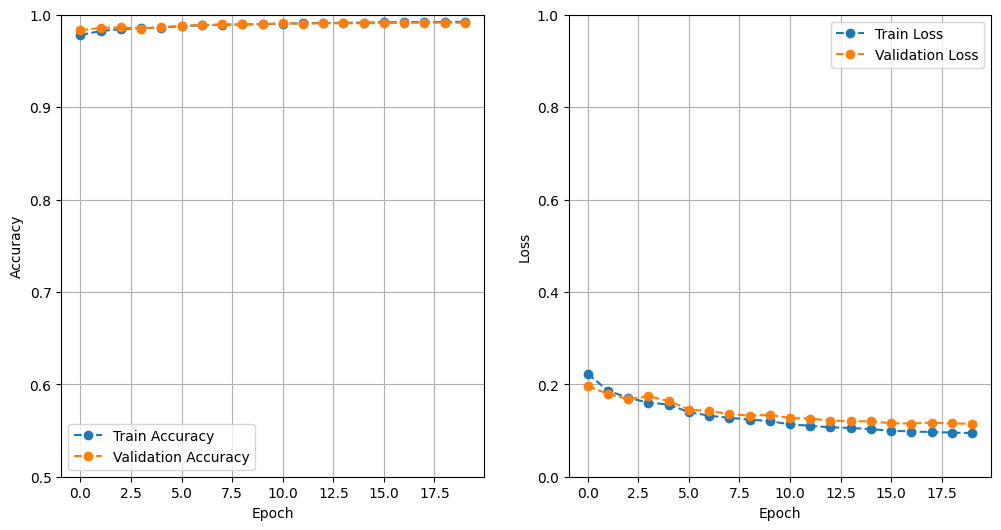

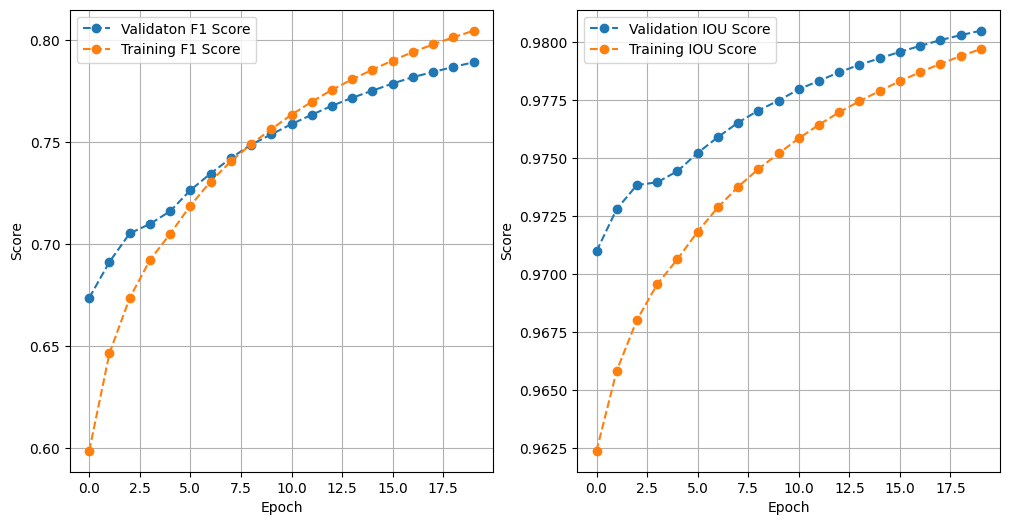

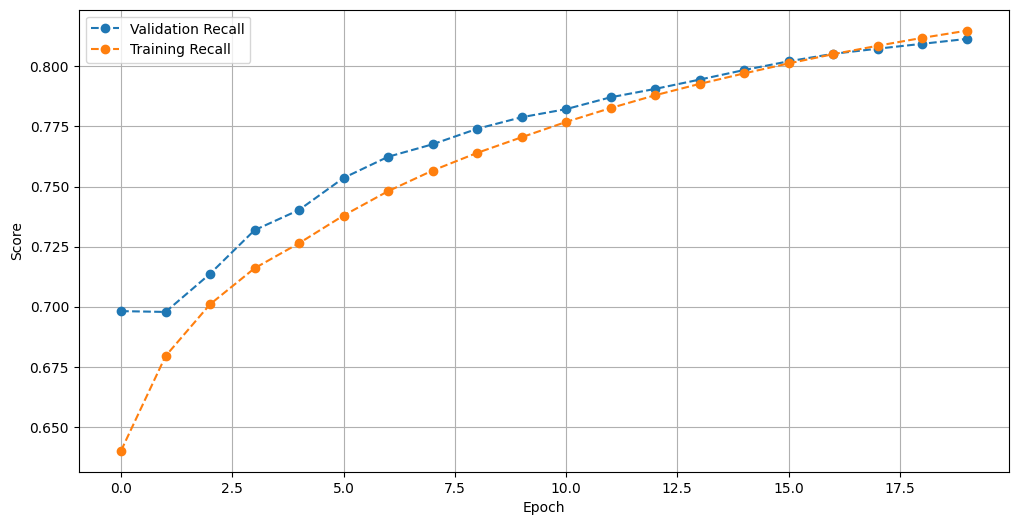

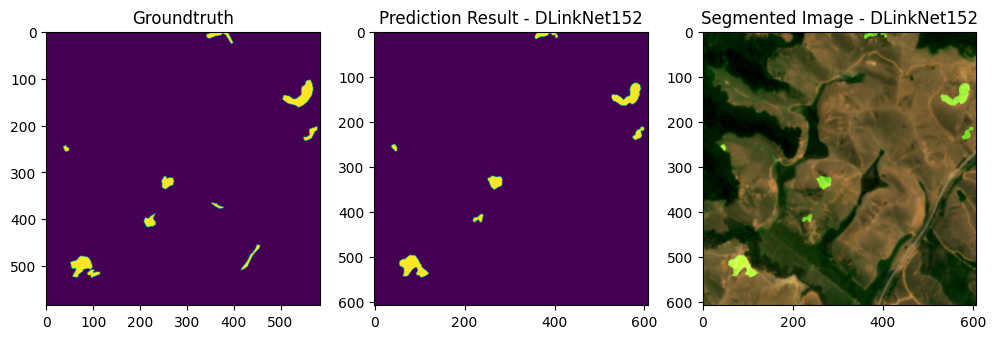

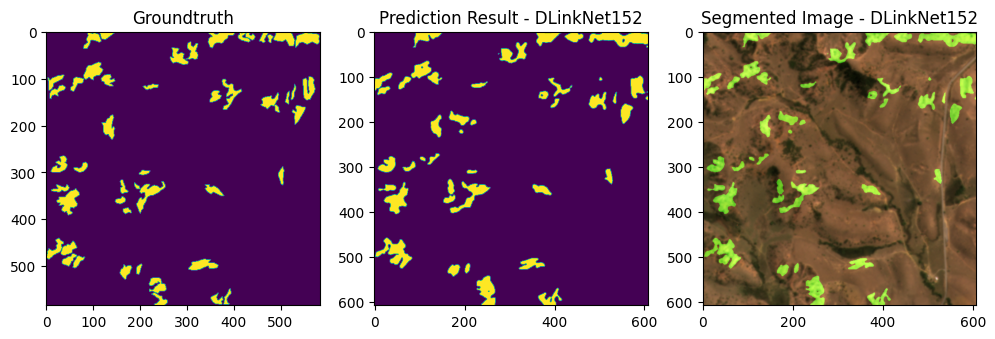

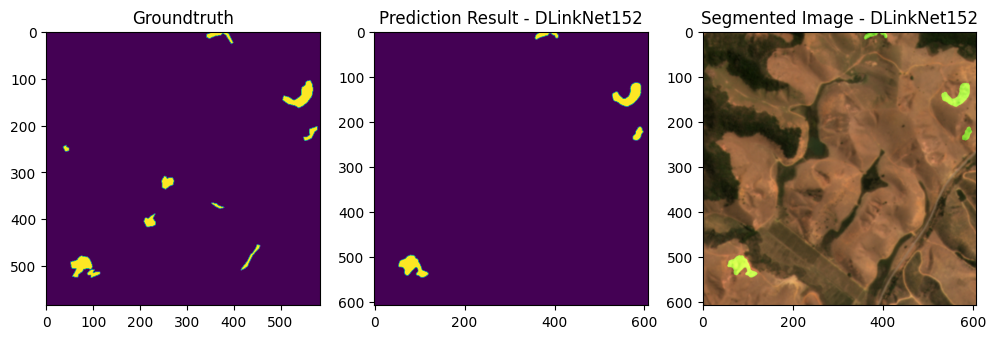

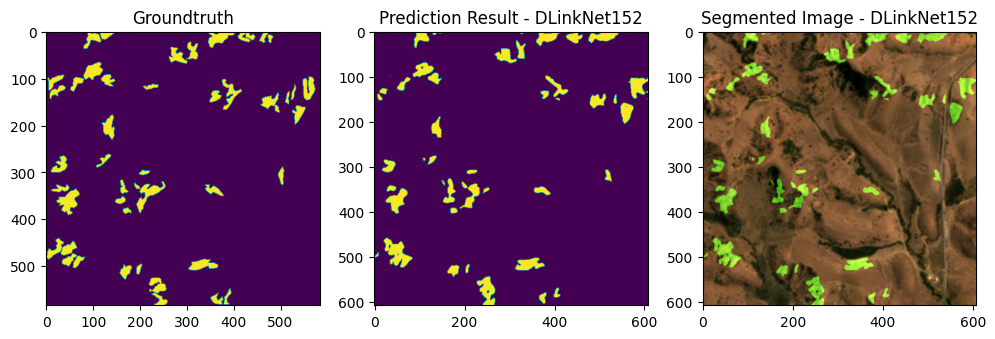

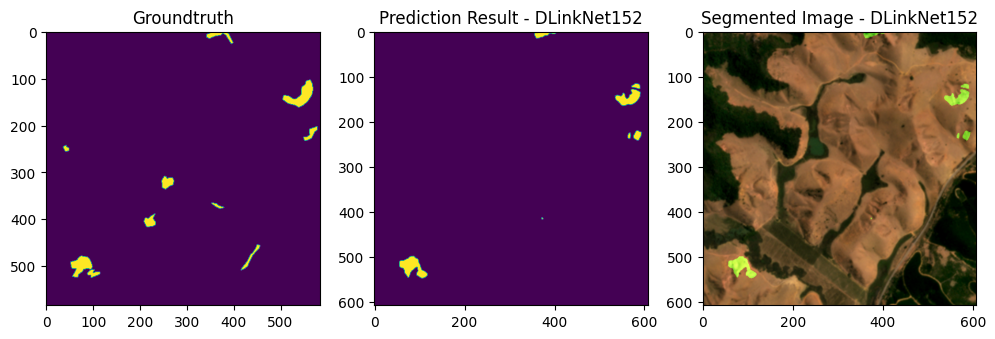

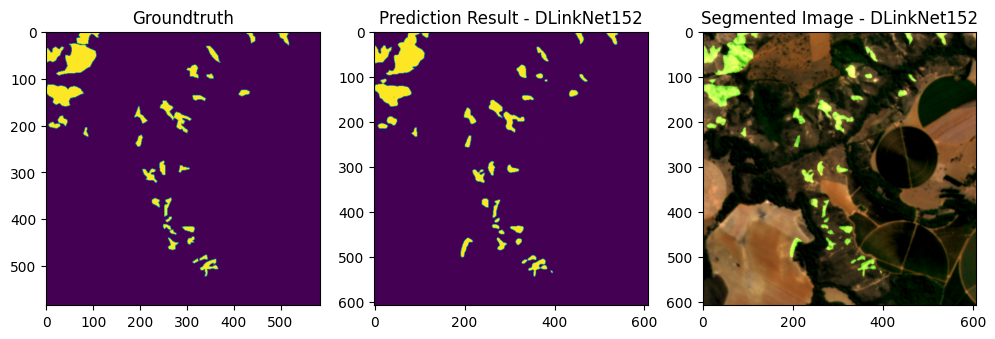

In [ ]:
# %%

if model_loading:
    checkpoint = torch.load(path_model)
    model.load_state_dict(checkpoint["model_state_dict"])

if model_training:
    train(
        model,
        training_generator,
        validation_generator,
        loss_func=BCEIoULoss(),
        learning_rate=2e-4,
        epochs=20,
        model_validation=model_validation,
        cuda_available=cuda_available,
        path_model=path_model,
        patience=3,
    )

for aux in range(747, 753):
    test(path_testing, aux, model, cuda_available)